## Load data

In [1]:
import unicodedata
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/train_pre.csv')

In [3]:
# pretty much useless features
df = df.drop(columns=['Nd', 'Cc', 'No', 'Nl', 'Co', 'Cn'])
df = df.reset_index()

In [4]:
lang_means = df.groupby(["Language"]).mean()
print(lang_means)

              index      Lu       Ll      Zs      Po     Pd     Ps     Pe  \
Language                                                                    
ace       60549.632  13.472  223.534  43.992   7.480  0.784  0.434  0.432   
afr       60773.022  13.716  331.412  69.256   9.190  1.276  0.636  0.636   
als       60433.918  21.422  265.276  56.234   8.472  0.900  0.796  0.710   
amh       60198.206   0.676    4.290  56.952   8.312  0.534  0.944  0.934   
ang       58769.148  10.642  207.452  41.732   6.336  0.348  0.542  0.532   
...             ...     ...      ...     ...     ...    ...    ...    ...   
yid       56569.846   0.678    4.182  59.784   8.054  0.506  0.490  0.490   
yor       60713.550  13.836  242.096  62.848   7.888  1.432  1.120  1.122   
zea       57323.832  10.920  227.444  50.208  11.152  0.850  0.382  0.380   
zh-yue    57598.768   3.958   35.150   7.086  14.244  0.376  2.500  2.498   
zho       61318.910   5.762   12.770   2.656  17.778  0.372  2.296  2.300   

In [5]:
lang_vec = df['Language']
print(lang_vec)

0         est
1         swe
2         mai
3         oci
4         tha
         ... 
117495    bos
117496    lim
117497    lzh
117498    dan
117499    isl
Name: Language, Length: 117500, dtype: object


In [6]:
# One hot encoding of the languages
onehot_lang = pd.get_dummies(lang_vec, prefix='Lang')

In [7]:
data = df.drop('Language', axis=1).drop('index', axis=1)
print(data)

        Lu   Ll   Zs  Po  Pd  Ps  Pe   Lo  Mc  Mn  Pi  Pf  Cf  Sm  Lm  So  Sc  \
0        9  283   45   6   2   0   0    0   0   0   0   0   0   0   0   0   0   
1       17  120   31  11   3   3   3    0   0   0   0   0   0   0   0   0   0   
2        0    0   63   8   0   0   0  237  61  67   0   0   0   0   0   0   0   
3       42  750  159  37   1  16  15    0   0   0   2   4   0   0   0   0   0   
4        3   15   13   1   0   1   1  179   0  41   0   0   0   0   0   0   0   
...     ..  ...  ...  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
117495  26  792  187  27   0   3   3    0   0   0   0   0   0   0   0   0   0   
117496  14  200   45   9   1   0   0    0   0   0   0   0   0   0   0   0   0   
117497   0    0    0  34   0   1   1  195   0   0   0   0   0   0   0   0   0   
117498  19  495  106  16   0   0   0    0   0   0   0   0   0   0   0   0   0   
117499   6  238   46   4   0   0   0    0   0   0   0   0   0   0   0   0   0   

        Sk  Pc  
0        0

In [8]:
# Print the maximum per column
print(data.max(axis=0))

Lu     1156
Ll     7592
Zs     4506
Po    10324
Pd      417
Ps      237
Pe      347
Lo    30418
Mc     1666
Mn     9174
Pi       79
Pf       72
Cf      768
Sm     1000
Lm      156
So      217
Sc       10
Sk       68
Pc       33
dtype: int64


In [9]:
# Normalize the data over the maximum per column
max_norm_data = data / data.max(axis=0)
max_norm_data

,Lu,Ll,Zs,Po,Pd,Ps,Pe,Lo,Mc,Mn,Pi,Pf,Cf,Sm,Lm,So,Sc,Sk,Pc
0,0.007785,0.037276,0.009987,0.000581,0.004796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.014706,0.015806,0.006880,0.001065,0.007194,0.012658,0.008646,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.013981,0.000775,0.000000,0.000000,0.000000,0.007791,0.036615,0.007303,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.036332,0.098788,0.035286,0.003584,0.002398,0.067511,0.043228,0.000000,0.000000,0.000000,0.025316,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.002595,0.001976,0.002885,0.000097,0.000000,0.004219,0.002882,0.005885,0.000000,0.004469,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117495,0.022491,0.104320,0.041500,0.002615,0.000000,0.012658,0.008646,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117496,0.012111,0.026344,0.009987,0.000872,0.002398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117497,0.000000,0.000000,0.000000,0.003293,0.000000,0.004219,0.002882,0.006411,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117498,0.016436,0.065200,0.023524,0.001550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
norm_data = data.div(data.sum(axis=1), axis=0)
print(norm_data)

              Lu        Ll        Zs        Po        Pd        Ps        Pe  \
0       0.026087  0.820290  0.130435  0.017391  0.005797  0.000000  0.000000   
1       0.090426  0.638298  0.164894  0.058511  0.015957  0.015957  0.015957   
2       0.000000  0.000000  0.144495  0.018349  0.000000  0.000000  0.000000   
3       0.040936  0.730994  0.154971  0.036062  0.000975  0.015595  0.014620   
4       0.011811  0.059055  0.051181  0.003937  0.000000  0.003937  0.003937   
...          ...       ...       ...       ...       ...       ...       ...   
117495  0.025048  0.763006  0.180154  0.026012  0.000000  0.002890  0.002890   
117496  0.052045  0.743494  0.167286  0.033457  0.003717  0.000000  0.000000   
117497  0.000000  0.000000  0.000000  0.147186  0.000000  0.004329  0.004329   
117498  0.029874  0.778302  0.166667  0.025157  0.000000  0.000000  0.000000   
117499  0.020408  0.809524  0.156463  0.013605  0.000000  0.000000  0.000000   

              Lo        Mc        Mn   

### VarianceThresholding for feature selection

In [ ]:
from sklearn.feature_selection import VarianceThreshold

X = data.to_numpy()
Y = norm_data.to_numpy()
print(X.shape)
print(Y.shape)

In [ ]:
selector = VarianceThreshold(0.5)
new_x = selector.fit_transform(X)
selector = VarianceThreshold(0.00005)
new_y = selector.fit_transform(Y)
print(new_x.shape)
print(new_y.shape)

# Scikit RandomForestClassification

### Without normalisation of data

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Spliiting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(data, onehot_lang, test_size=0.20, random_state=0)

In [10]:
# fitting the model
model = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

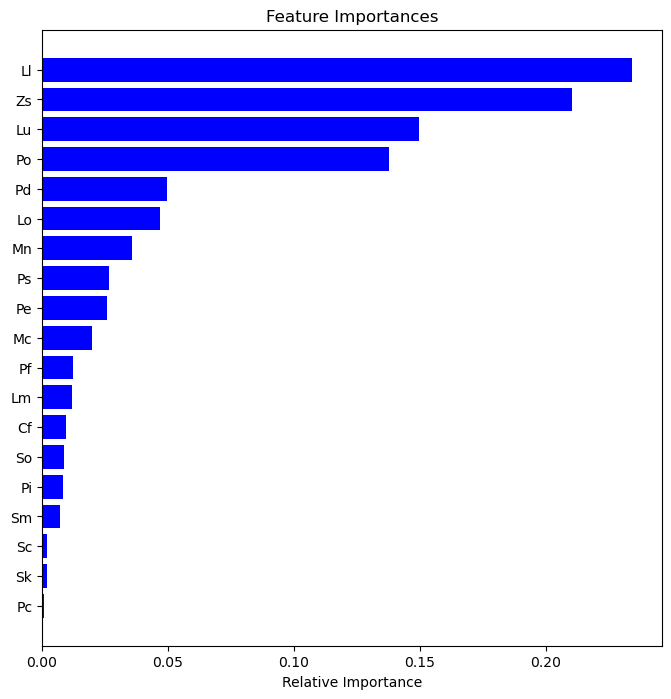

In [11]:
# plotting feature importances
features = df.drop('Language', axis=1).columns
features = features.drop('index')
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

predictions = np.round(y_pred)

accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.1869787234042553


### With normalisation of the data (each feature is a % of the sentence)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Spliiting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(norm_data, onehot_lang, test_size=0.20, random_state=0)

In [10]:
# fitting the model
model = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

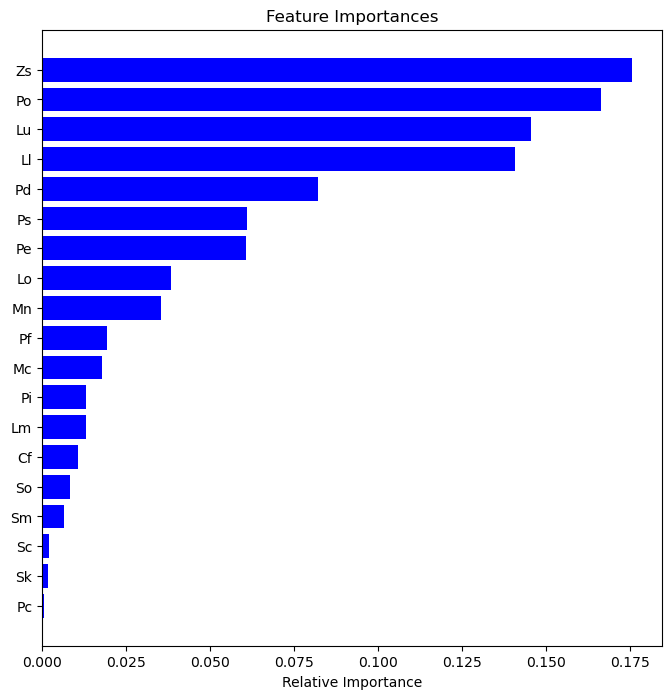

In [11]:
# plotting feature importances
features = df.drop('Language', axis=1).columns
features = features.drop('index')
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

predictions = np.round(y_pred)

accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.2027659574468085


# XGBoost classification

In [16]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# encode languages in a 1 d vector
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(lang_vec)
label_encoded_y = label_encoder.transform(lang_vec)

# Spliiting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(norm_data, label_encoded_y, test_size=0.20, random_state=42)

model = XGBClassifier(n_estimators=100, eval_metric='mlogloss', n_jobs=-1, max_depth=4)
model.fit(X_train, y_train)

/home/nils/miniconda3/envs/std/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/nils/miniconda3/envs/std/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/nils/miniconda3/envs/std/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(d

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

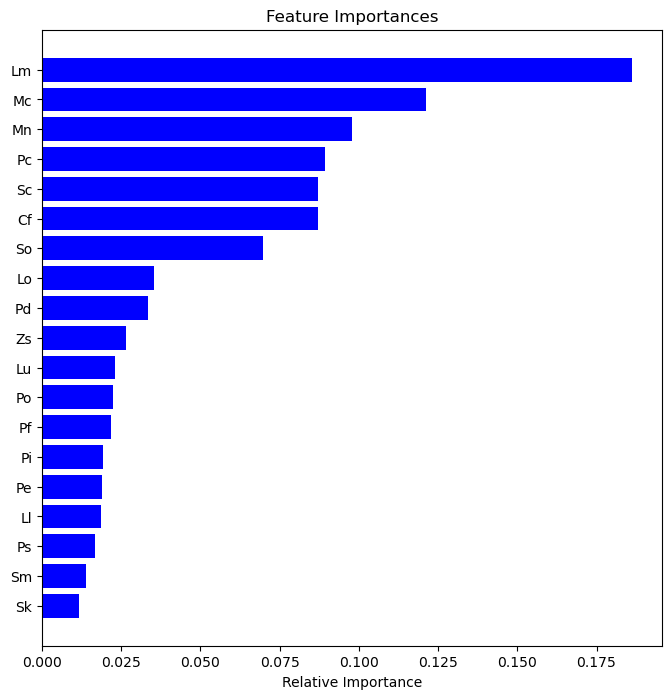

In [18]:
# plotting feature importances
features = df.drop('Language', axis=1).columns
features = features.drop('index')
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [17]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.294


## SVM

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, NuSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# encode languages in a 1 d vector
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(lang_vec)
label_encoded_y = label_encoder.transform(lang_vec)

X_train, X_test, y_train, y_test = train_test_split(norm_data, label_encoded_y, test_size=0.20, random_state=42)

clf = make_pipeline(StandardScaler(), LinearSVC())

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

/home/nils/miniconda3/envs/std/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [38]:
predictions = np.round(y_pred)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.17595744680851064


## Deconvolutional Neural Net


In [55]:
import torch

class DeconvolutionalClassifier(torch.nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dims=None,
                 h_activation=torch.nn.ReLU, c_activation=torch.nn.Softmax):
        super().__init__()
        if hidden_dims is None:
            hidden_dims = []
        
        # Save arguments
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hidden_dims = hidden_dims
        self.h_activation = h_activation
        self.c_activation = c_activation

        dims = [input_dim] + hidden_dims + [output_dim]

        # Construct layers
        layers = []
        for i_dim, o_dim in zip(dims, dims[1:]):
            layers.append(torch.nn.Linear(i_dim, o_dim))
            layers.append(self.h_activation())
        layers = layers[:-1]  # remove last activation
        layers.append(self.c_activation())
        self.classifier = torch.nn.Sequential(*layers)

    def forward(self, x):
        return self.classifier(x)

In [61]:
import skorch
from skorch import NeuralNet
from skorch.helper import predefined_split
from skorch.dataset import Dataset
import random
import os
from tqdm.auto import trange
from meta_collector import metadata_collector
from sklearn.metrics import classification_report

def load_ds(path: str):
    with open(path, encoding="utf8") as f:
        for l in f:
            yield l.rstrip("\n")

def seed_everything(seed: int):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(13331)
    
x_train = load_ds("../data/wili-2018/x_train.txt")
y_train = load_ds("../data/wili-2018/y_train.txt")
x_test = load_ds("../data/wili-2018/x_test.txt")
y_test = load_ds("../data/wili-2018/y_test.txt")

x_train = pd.DataFrame(x_train, columns=["sentence"])
y_train = pd.DataFrame(y_train, columns=["lang"])
x_test = pd.DataFrame(x_test, columns=["sentence"])
y_test = pd.DataFrame(y_test, columns=["lang"])

# Create a train dev split
x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

train = pd.concat([x_train, y_train], axis=1)
dev = pd.concat([x_dev, y_dev], axis=1)
test = pd.concat([x_test, y_test], axis=1)
langs = sorted(y_train.lang.unique())
chars = set(c for s in train.sentence for c in s)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Switch here by uncommenting and commenting
features = ["Ll", "Zs", "Lu", "Po", "Pd", "Lo", "Mn", "Ps", "Pe", "Mc"]
# features = []

cuda


In [62]:
def get_features_embeddings(sentences, features, batch_size=4, shrinkage_fact=1):
    sentences = sentences[:len(sentences) // shrinkage_fact]    
    embeddings = torch.zeros((len(sentences), len(features))).to(device)
    
    for i in trange(0, len(sentences), batch_size):
        meta = metadata_collector(list(sentences[i:i+batch_size]), device, features)
        embeddings[i:i+len(meta)] = meta

    return torch.div(embeddings.T, torch.sum(embeddings, 1)).T

In [48]:
train_embeddings = get_features_embeddings(train.sentence, features, batch_size=32)
dev_embeddings = get_features_embeddings(dev.sentence, features, batch_size=32)

  0%|          | 0/2938 [00:00<?, ?it/s]

  0%|          | 0/735 [00:00<?, ?it/s]

In [50]:
language_to_index = {lang: i for i, lang in enumerate(langs)}
index_to_language = {i: lang for i, lang in enumerate(langs)}

y_dev_id = [language_to_index[lang] for lang in y_dev.lang]
y_train_id = [language_to_index[lang] for lang in y_train.lang]
valid_ds = Dataset(dev_embeddings, y_dev_id[:len(dev_embeddings)])

In [72]:
net = NeuralNet(
    module=DeconvolutionalClassifier,
    module__input_dim=len(features),
    module__output_dim=len(langs),
    module__hidden_dims=[122],
    module__h_activation=torch.nn.ReLU,
    module__c_activation=torch.nn.Softmax,
    criterion=torch.nn.CrossEntropyLoss,
    train_split=predefined_split(valid_ds),
    max_epochs=500,
    device=device,
    verbose=1,
    optimizer = torch.optim.SGD,
    optimizer__momentum=0.9,
    optimizer__lr=0.2,
#     optimizer = torch.optim.Adam,
#     callbacks=[
#         skorch.callbacks.EarlyStopping()
#     ]
)

net.fit(train_embeddings, y_train_id[:len(train_embeddings)])

/home/nils/miniconda3/envs/std/lib/python3.9/site-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        5.4596        5.4596  0.8112
      2        5.4595        5.4595  0.8134
      3        5.4595        5.4595  0.8049
      4        5.4594        5.4594  0.8158
      5        5.4594        5.4593  0.8260
      6        5.4592        5.4591  0.8327
      7        5.4590        5.4588  0.8101
      8        5.4583        5.4568  0.7911
      9        5.4564        5.4562  0.8073
     10        5.4561        5.4560  0.7960
     11        5.4560        5.4558  0.7943
     12        5.4558        5.4556  0.7900
     13        5.4556        5.4554  0.7919
     14        5.4554        5.4551  0.8028
     15        5.4548        5.4542  0.7993
     16        5.4530        5.4506  0.7965
     17        5.4493        5.4484  0.7974
     18        5.4482        5.4479  0.7962
     19        5.4478        5.4476  0.8031
     20        5.4476        5.4474  0.7997
     21        5.4474        5.4

    132        5.4297        5.4292  0.8081
    133        5.4296        5.4292  0.8166
    134        5.4296        5.4292  0.8048
    135        5.4296        5.4292  0.8060
    136        5.4296        5.4291  0.8047
    137        5.4296        5.4291  0.8055
    138        5.4296        5.4291  0.8060
    139        5.4296        5.4291  0.8043
    140        5.4296        5.4291  0.8059
    141        5.4295        5.4291  0.8085
    142        5.4295        5.4291  0.8048
    143        5.4295        5.4291  0.8074
    144        5.4295        5.4290  0.8039
    145        5.4295        5.4290  0.8201
    146        5.4295        5.4290  0.8158
    147        5.4295        5.4290  0.8148
    148        5.4295        5.4290  0.8051
    149        5.4295        5.4290  0.8033
    150        5.4294        5.4290  0.7994
    151        5.4294        5.4290  0.8166
    152        5.4294        5.4290  0.8032
    153        5.4294        5.4290  0.8100
    154        5.4294        5.4

    266        5.4285        5.4280  0.8048
    267        5.4285        5.4280  0.7902
    268        5.4284        5.4280  0.7885
    269        5.4284        5.4280  0.7881
    270        5.4284        5.4280  0.7883
    271        5.4284        5.4279  0.7911
    272        5.4284        5.4279  0.9506
    273        5.4284        5.4279  0.7912
    274        5.4284        5.4279  0.7944
    275        5.4284        5.4279  0.7918
    276        5.4284        5.4279  0.7914
    277        5.4284        5.4279  0.7931
    278        5.4283        5.4279  0.7923
    279        5.4283        5.4279  0.7942
    280        5.4283        5.4279  0.8071
    281        5.4283        5.4279  0.8021
    282        5.4283        5.4279  0.8116
    283        5.4283        5.4279  0.7967
    284        5.4283        5.4279  0.7987
    285        5.4283        5.4279  0.7955
    286        5.4283        5.4279  0.8026
    287        5.4283        5.4279  0.8096
    288        5.4283        5.4

    403        5.4259        5.4256  0.7977
    404        5.4259        5.4256  0.7958
    405        5.4259        5.4256  0.7951
    406        5.4259        5.4256  0.8007
    407        5.4259        5.4256  0.7927
    408        5.4259        5.4255  0.7916
    409        5.4259        5.4255  0.7940
    410        5.4259        5.4255  0.7971
    411        5.4258        5.4255  0.7981
    412        5.4258        5.4255  0.8053
    413        5.4258        5.4255  0.8361
    414        5.4258        5.4255  0.8163
    415        5.4258        5.4255  0.8207
    416        5.4258        5.4255  0.8153
    417        5.4258        5.4255  0.8124
    418        5.4258        5.4255  0.8177
    419        5.4258        5.4255  0.8159
    420        5.4258        5.4255  0.8206
    421        5.4258        5.4255  0.8143
    422        5.4258        5.4255  0.8158
    423        5.4258        5.4255  0.8149
    424        5.4258        5.4255  0.8127
    425        5.4258        5.4

<class 'skorch.net.NeuralNet'>[initialized](
  module_=DeconvolutionalClassifier(
    (classifier): Sequential(
      (0): Linear(in_features=10, out_features=122, bias=True)
      (1): ReLU()
      (2): Linear(in_features=122, out_features=235, bias=True)
      (3): Softmax(dim=None)
    )
  ),
)

In [73]:
dev_y_pred_id = np.argmax(net.predict(dev_embeddings), axis=1)
dev_y_pred = [index_to_language[id] for id in dev_y_pred_id]
print(classification_report(y_dev[:len(dev_y_pred)], dev_y_pred, target_names=langs, zero_division=0))

              precision    recall  f1-score   support

         ace       0.06      0.31      0.10       100
         afr       0.00      0.00      0.00       100
         als       0.00      0.00      0.00       100
         amh       0.00      0.00      0.00       100
         ang       0.00      0.00      0.00       100
         ara       0.00      0.00      0.00       100
         arg       0.00      0.00      0.00       100
         arz       0.00      0.00      0.00       100
         asm       0.00      0.00      0.00       100
         ast       0.00      0.00      0.00       100
         ava       0.00      0.00      0.00       100
         aym       0.00      0.00      0.00       100
         azb       0.00      0.00      0.00       100
         aze       0.00      0.00      0.00       100
         bak       0.00      0.00      0.00       100
         bar       0.00      0.00      0.00       100
         bcl       0.00      0.00      0.00       100
   be-tarask       0.00    